In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ các file đã tải lên
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wednesday_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wednesday_test.csv')

# Hiển thị 5 dòng đầu tiên của dữ liệu huấn luyện để kiểm tra
train_data.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,13,Gadget Geek,Episode 37,92.50,Technology,68.42,Wednesday,Afternoon,87.87,0.0,Neutral,50.93591
1,19,Sport Spot,Episode 61,51.60,Sports,61.60,Wednesday,Evening,90.41,1.0,Positive,14.96035
2,20,Funny Folks,Episode 100,54.67,Comedy,45.47,Wednesday,Afternoon,NaN,2.0,Neutral,29.22750
3,22,Business Briefs,Episode 54,66.22,Business,62.81,Wednesday,Night,88.86,0.0,Neutral,47.60142
4,25,Tech Trends,Episode 97,105.35,Technology,55.03,Wednesday,Afternoon,76.12,1.0,Neutral,99.15797


In [5]:
# Kalman Basic Model using NumPy (without external libraries)
def kalman_basic(train_series):
    x_est = train_series[0]  # Initial estimate
    P = 1  # Initial estimate uncertainty
    F = 1  # State transition matrix
    H = 1  # Measurement matrix
    R = 1  # Measurement noise covariance
    Q = 0.01  # Process noise covariance

    state_estimates = []

    for z in train_series:
        # Prediction step
        x_pred = F * x_est
        P_pred = F * P * F + Q

        # Update step
        K = P_pred * H / (H * P_pred * H + R)  # Kalman gain
        x_est = x_pred + K * (z - H * x_pred)
        P = (1 - K * H) * P_pred

        # Store result
        state_estimates.append(x_est)

    return np.array(state_estimates)


In [6]:
# Kalman Irregular Model (sử dụng thời gian không đều)
def kalman_irregular(train_series, time_values):
    delta_t = np.diff(time_values, prepend=time_values[0])  # Calculate time differences between data points
    x_est = train_series[0]
    P = 1
    F = 1
    H = 1
    R = 1
    Q = 0.01

    state_estimates = []

    for z in train_series:
        # Prediction step
        x_pred = F * x_est
        P_pred = F * P * F + Q

        # Update step
        K = P_pred * H / (H * P_pred * H + R)
        x_est = x_pred + K * (z - H * x_pred)
        P = (1 - K * H) * P_pred

        state_estimates.append(x_est)

    return np.array(state_estimates)

In [7]:
# Kalman Time Series Model
def kalman_timeseries(train_series):
    x_est = train_series[0]
    P = 1
    F = 1
    H = 1
    R = 1
    Q = 0.01

    state_estimates = []

    for z in train_series:
        # Prediction step
        x_pred = F * x_est
        P_pred = F * P * F + Q

        # Update step
        K = P_pred * H / (H * P_pred * H + R)
        x_est = x_pred + K * (z - H * x_pred)
        P = (1 - K * H) * P_pred

        state_estimates.append(x_est)

    return np.array(state_estimates)

In [8]:
# Hàm tính toán RMSE (Root Mean Squared Error)
def calculate_rmse(true_values, predicted_values):
    return np.sqrt(mean_squared_error(true_values, predicted_values))


In [9]:
# Lấy chuỗi thời gian 'Listening_Time_minutes' và 'id' (tạm sử dụng 'id' như thời gian)
true_values = train_data['Listening_Time_minutes'].dropna().values
time_values = train_data['id'].values

# Áp dụng các mô hình Kalman
basic_model_result = kalman_basic(true_values)
irregular_model_result = kalman_irregular(true_values, time_values)
timeseries_model_result = kalman_timeseries(true_values)

# Tính toán RMSE cho từng mô hình
rmse_basic = calculate_rmse(true_values, basic_model_result)
rmse_irregular = calculate_rmse(true_values, irregular_model_result)
rmse_timeseries = calculate_rmse(true_values, timeseries_model_result)


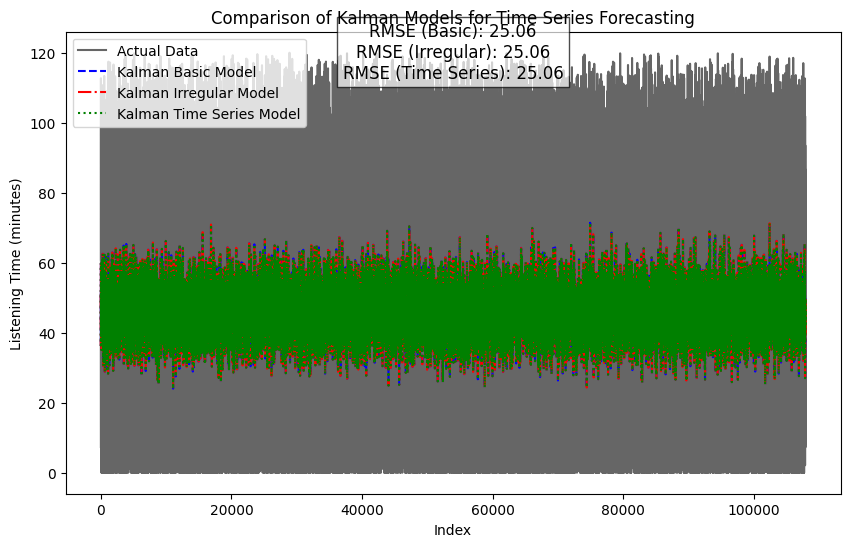

In [10]:
# Vẽ biểu đồ so sánh giữa các mô hình
plt.figure(figsize=(10,6))

# Vẽ các chuỗi thời gian dự đoán từ ba mô hình
plt.plot(true_values, label='Actual Data', color='black', linestyle='-', alpha=0.6)
plt.plot(basic_model_result, label='Kalman Basic Model', color='blue', linestyle='--')
plt.plot(irregular_model_result, label='Kalman Irregular Model', color='red', linestyle='-.')
plt.plot(timeseries_model_result, label='Kalman Time Series Model', color='green', linestyle=':')

# Thêm tiêu đề và nhãn
plt.title('Comparison of Kalman Models for Time Series Forecasting')
plt.xlabel('Index')
plt.ylabel('Listening Time (minutes)')
plt.legend()

# Hiển thị RMSE trên biểu đồ
plt.text(0.5, 0.9, f'RMSE (Basic): {rmse_basic:.2f}\nRMSE (Irregular): {rmse_irregular:.2f}\nRMSE (Time Series): {rmse_timeseries:.2f}',
         transform=plt.gca().transAxes, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Hiển thị biểu đồ
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error

# Hàm tính toán MAE và MAPE
def calculate_mae(true_values, predicted_values):
    return mean_absolute_error(true_values, predicted_values)

def calculate_mape(true_values, predicted_values):
    # Đảm bảo tránh chia cho 0 bằng cách thay thế giá trị 0 bằng giá trị nhỏ
    true_values_safe = np.where(true_values == 0, 1e-10, true_values)
    return np.mean(np.abs((true_values_safe - predicted_values) / true_values_safe)) * 100

# Tính MAE và MAPE cho từng mô hình
mae_basic = calculate_mae(true_values, basic_model_result)
mae_irregular = calculate_mae(true_values, irregular_model_result)
mae_timeseries = calculate_mae(true_values, timeseries_model_result)

mape_basic = calculate_mape(true_values, basic_model_result)
mape_irregular = calculate_mape(true_values, irregular_model_result)
mape_timeseries = calculate_mape(true_values, timeseries_model_result)

# In kết quả MAE và MAPE
print(f"MAE (Basic Model): {mae_basic:.2f}")
print(f"MAE (Irregular Model): {mae_irregular:.2f}")
print(f"MAE (Time Series Model): {mae_timeseries:.2f}")

print(f"MAPE (Basic Model): {mape_basic:.2f}%")
print(f"MAPE (Irregular Model): {mape_irregular:.2f}%")
print(f"MAPE (Time Series Model): {mape_timeseries:.2f}%")

MAE (Basic Model): 20.91
MAE (Irregular Model): 20.91
MAE (Time Series Model): 20.91
MAPE (Basic Model): 467730366534.27%
MAPE (Irregular Model): 467730366534.27%
MAPE (Time Series Model): 467730366534.27%
